In [2]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
move_to_rootf(print_tf=True)

cwd: /Users/opisthofulax/PhD/LRG-Signed


In [ ]:
p = 0.108

In [ ]:
for L in [8, 16, 32, 64, 128, 256]:
    merged_dict = Counter()
    number_of_averages = 4096 // L
    lattice = Lattice2D(L, pflip=p)
    filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}.pickle'
    if os.path.exists(filename):
        continue
    for avg in tqdm(range(number_of_averages)):
        lattice.flip_random_fract_edges()
        dist_dict = lattice.cluster_distribution_list()
        merged_dict += Counter(dist_dict)
        lattice.unflip_all()
        delattr(lattice, "eigV")


    with open(filename, 'wb') as file:
        pickle.dump(list(merged_dict.values()), file)

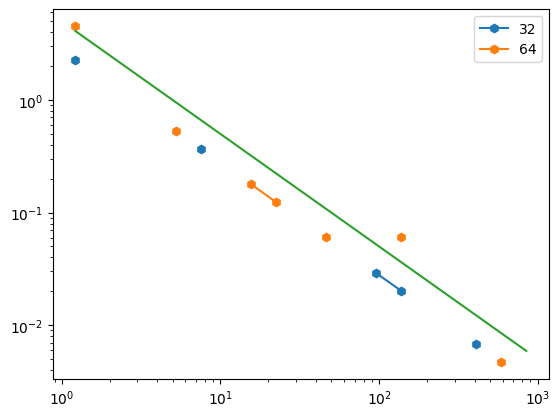

In [16]:
p = 0.01
#
for side in [32, 64]:
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={999}_.pickle"
    with open(fpath, 'rb') as file:
        prova = pickle.load(file)
    binc, hist, bw = log_binning(prova, 20)
    hist1 = hist/bw
    np.where(hist1==0., np.inf, hist1)
    plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
plt.plot(binc, 5*(1.0*np.array(binc))**(-1))
#
plt.legend()
plt.xscale('log')
plt.yscale('log')

1000 medie, up to 1024, progressive save